In [116]:
%matplotlib inline
# from memory_profiler import memory_usage
import os
import pandas as pd
from glob import glob
import numpy as np

In [1360]:
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
# from path import Path

In [3]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

import os
from glob import glob

Using TensorFlow backend.


#### First step is to create a picture from the audio file

In [4]:
data = pd.read_csv('train/data.csv')

In [36]:
filename= 'train/Train/0.wav'

In [37]:
i = random.choice(data.ID)
ipd.Audio('train/Train/'+str(i)+'.wav')

Visualizing the melspectrogram 

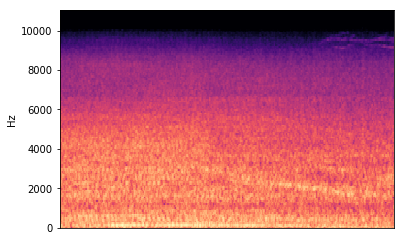

In [38]:
X, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
plt.show()

Using a function to generate and save the melspectrogram for each audio file

In [1263]:
# Although this function was modified and many parameteres were explored with, most of it 
# came from Source 18 (sources in the READ.ME)

def images(file):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join(os.path.abspath('train/Train')+'/'+str(file.ID)+'.wav')
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = file.ID
    file  = 'val_images/' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

Now we load the dataframe and slice the data into train, validation and testing data like before. Again, 3435 for training, 1000 for validation and 1000 for testing.

In [1252]:
data = pd.read_csv('train/data.csv')

In [1253]:
train = data[:3435]
val = data[3435:4435]
test = data[4435:]

We use the function to create all the images from train, val and test

In [1254]:
train.apply(images, axis=1);

In [1261]:
test.apply(images, axis=1);

In [1264]:
val.apply(images, axis=1);

In [1453]:
plt.close('all')

In [1265]:
os.system('say -v Juan ya acabé');

We will use the datagen.flow_from_dataframe from the keras documentation to use with the CNN
https://keras.io/preprocessing/image/

![keras](img/keras.jpg)

In [1315]:
data = pd.read_csv('train/data.csv',dtype=str)

In [1316]:
train = data[:3435]
val = data[3435:4435]
test = data[4435:]

In [1317]:
# Function to change the file names to the image names to use them later 
def make_jpg(files):
    return str(files)+'.jpg'

In [1318]:
train['ID'] = train["ID"].apply(make_jpg)

/Users/jurgenarias/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1324]:
val['ID'] = val["ID"].apply(make_jpg)

/Users/jurgenarias/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1325]:
test['ID'] = test["ID"].apply(make_jpg)

/Users/jurgenarias/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1319]:
# Rescaling the images as usual to feed into the CNN
datagen=ImageDataGenerator(rescale=1./255.)

In [1331]:
train_generator=datagen.flow_from_dataframe(
    dataframe=train,
    directory="train_images",
    x_col="ID",
    y_col="Class",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 3435 validated image filenames belonging to 10 classes.


In [1332]:
val_generator=datagen.flow_from_dataframe(
    dataframe=val,
    directory="val_images",
    x_col="ID",
    y_col="Class",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 1000 validated image filenames belonging to 10 classes.


In [1373]:
test_generator=datagen.flow_from_dataframe(
    dataframe=test,
    directory="test_images",
    x_col="ID",
    y_col="Class",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 1000 validated image filenames belonging to 10 classes.


In [1498]:
plt.close('all')

In [1509]:
# import os
os.system('say -v Juan ya acabé');

### Now we finally can build the CNN model and fit it

In [1521]:
# Building our model 
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [1522]:
# Compiling using adam and categorical crossentropy
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [1523]:
# Fitting our CNN with 250 epochs and setting the results to history for visuals
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=108,
                    validation_data=val_generator,
                    validation_steps=32,
                    epochs=250)

Epoch 1/250
108/108 [==============================] - 25s 229ms/step - loss: 2.2126 - accuracy: 0.1665 - val_loss: 2.1871 - val_accuracy: 0.2420
Epoch 2/250
108/108 [==============================] - 18s 164ms/step - loss: 2.0365 - accuracy: 0.2402 - val_loss: 2.0696 - val_accuracy: 0.2490
Epoch 3/250
108/108 [==============================] - 24s 221ms/step - loss: 1.9799 - accuracy: 0.2390 - val_loss: 2.0118 - val_accuracy: 0.2630
Epoch 4/250
108/108 [==============================] - 22s 202ms/step - loss: 1.8841 - accuracy: 0.2865 - val_loss: 1.9506 - val_accuracy: 0.3430
Epoch 5/250
108/108 [==============================] - 25s 232ms/step - loss: 1.7641 - accuracy: 0.3587 - val_loss: 1.9782 - val_accuracy: 0.3860
Epoch 6/250
108/108 [==============================] - 23s 213ms/step - loss: 1.6798 - accuracy: 0.3866 - val_loss: 1.7082 - val_accuracy: 0.4550
Epoch 7/250
108/108 [==============================] - 24s 219ms/step - loss: 1.5498 - accuracy: 0.4419 - val_loss: 1.5992 -

Epoch 57/250
108/108 [==============================] - 21s 198ms/step - loss: 0.4049 - accuracy: 0.8763 - val_loss: 0.5843 - val_accuracy: 0.8760
Epoch 58/250
108/108 [==============================] - 22s 204ms/step - loss: 0.3699 - accuracy: 0.8815 - val_loss: 0.2757 - val_accuracy: 0.8600
Epoch 59/250
108/108 [==============================] - 24s 218ms/step - loss: 0.3609 - accuracy: 0.8766 - val_loss: 0.7728 - val_accuracy: 0.8930
Epoch 60/250
108/108 [==============================] - 24s 219ms/step - loss: 0.3420 - accuracy: 0.8879 - val_loss: 0.7400 - val_accuracy: 0.8710
Epoch 61/250
108/108 [==============================] - 24s 221ms/step - loss: 0.3723 - accuracy: 0.8769 - val_loss: 0.1313 - val_accuracy: 0.8900
Epoch 62/250
108/108 [==============================] - 23s 215ms/step - loss: 0.3595 - accuracy: 0.8847 - val_loss: 0.0980 - val_accuracy: 0.8810
Epoch 63/250
108/108 [==============================] - 24s 219ms/step - loss: 0.3252 - accuracy: 0.8905 - val_loss: 0

108/108 [==============================] - 21s 197ms/step - loss: 0.1980 - accuracy: 0.9415 - val_loss: 0.1557 - val_accuracy: 0.9060
Epoch 168/250
108/108 [==============================] - 22s 205ms/step - loss: 0.2152 - accuracy: 0.9348 - val_loss: 0.0592 - val_accuracy: 0.9230
Epoch 169/250
108/108 [==============================] - 21s 196ms/step - loss: 0.2003 - accuracy: 0.9380 - val_loss: 0.0780 - val_accuracy: 0.9130
Epoch 170/250
108/108 [==============================] - 22s 199ms/step - loss: 0.2054 - accuracy: 0.9328 - val_loss: 0.0939 - val_accuracy: 0.9090
Epoch 171/250
108/108 [==============================] - 21s 196ms/step - loss: 0.1592 - accuracy: 0.9482 - val_loss: 0.1119 - val_accuracy: 0.9090
Epoch 172/250
108/108 [==============================] - 21s 196ms/step - loss: 0.1931 - accuracy: 0.9365 - val_loss: 0.0692 - val_accuracy: 0.9270
Epoch 173/250
108/108 [==============================] - 21s 197ms/step - loss: 0.2125 - accuracy: 0.9357 - val_loss: 0.0782 -

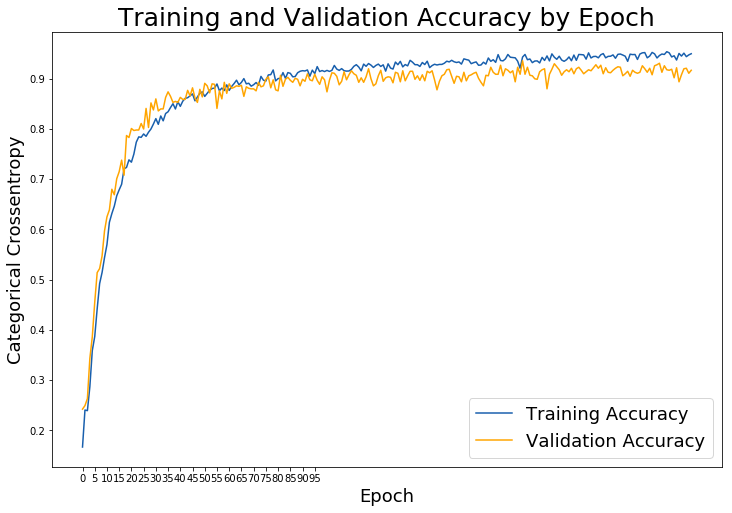

In [1524]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18)
plt.show();

In [1571]:
# Generating a new test dataframe that includes the labels for comparison and 
# checking the accuracy of our model with this never before seen data
test = data[4435:]

# Generating predictions on our never seen data with the model we built
preds = model.predict_generator(test_generator)

# Creating an empty list to store the values where the predictions are the maximum out 
# of all the 10 possible values
p = []
for i in range(0, len(preds)):
    p.append(np.where(preds[i] == max(preds[i])))

# Creating an empty list to store the values in a clean list
predictions = []
for i in range(0, len(preds)):
    predictions.append(p[i][0][0])
    
# Adding those predictions to our test dataframe
test['predictions'] = predictions

# Changing the numeric values to their corresponding labels
test['predictions'] = test['predictions'].map({8:'siren', 9:'street_music', 7:'jackhammer',
                   4:'drilling', 3:'dog_bark', 2:'children_playing',
                   6:'gun_shot', 5:'engine_idling', 0:'air_conditioner',
                   1:'car_horn'})

# Checking the percentage of correct predictions 
round(len(test[test['Class'] == test['predictions']])/len(test),2)

/Users/jurgenarias/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/jurgenarias/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0.92

### We got 92% accuracy on our test data

In [1588]:
# Saving the dataframe to use with our Dense NN to use as a voting classifier 
predic_cnn = pd.DataFrame(preds)

predic_cnn.to_csv('predict_cnn.csv', index=False)

In [1526]:
os.system('say -v Juan ya acabé');